In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
from lib import *
from pipeline_presets import *
from grid_search_presets import *

# Data Loading, Set Splitting Functions, Data Resampling

In [3]:
# Load breast cancer dataset
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df["target"] = cancer.target

# Preview
display(cancer_df.head())
display(cancer_df.describe())

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [4]:
def get_train_test_cancer(
    cancer_df,
    test_size=0.2,
    random_state=global_random_state,
    stratify=True,
    resample=True,
) -> tuple:
    """
    Returns a tuple of (X_train, X_test, y_train, y_test) for the diabetes dataset.
    """

    # Split the data into features and target variable
    X = cancer_df.drop(columns=["target"])
    y = cancer_df["target"]

    # Split the dataset into training and testing sets

    if stratify:
        return train_test_split(
            X, y, random_state=random_state, test_size=test_size, stratify=y
        )
    else:
        return train_test_split(X, y, random_state=random_state, test_size=0.2)

In [5]:
X_train, X_test, y_train, y_test = get_train_test_cancer(
    cancer_df,
    test_size=0.2,
    random_state=global_random_state,
    stratify=True,
    resample=True,
)

# Exploratory Data Analysis

## Pairplot (Only between means)

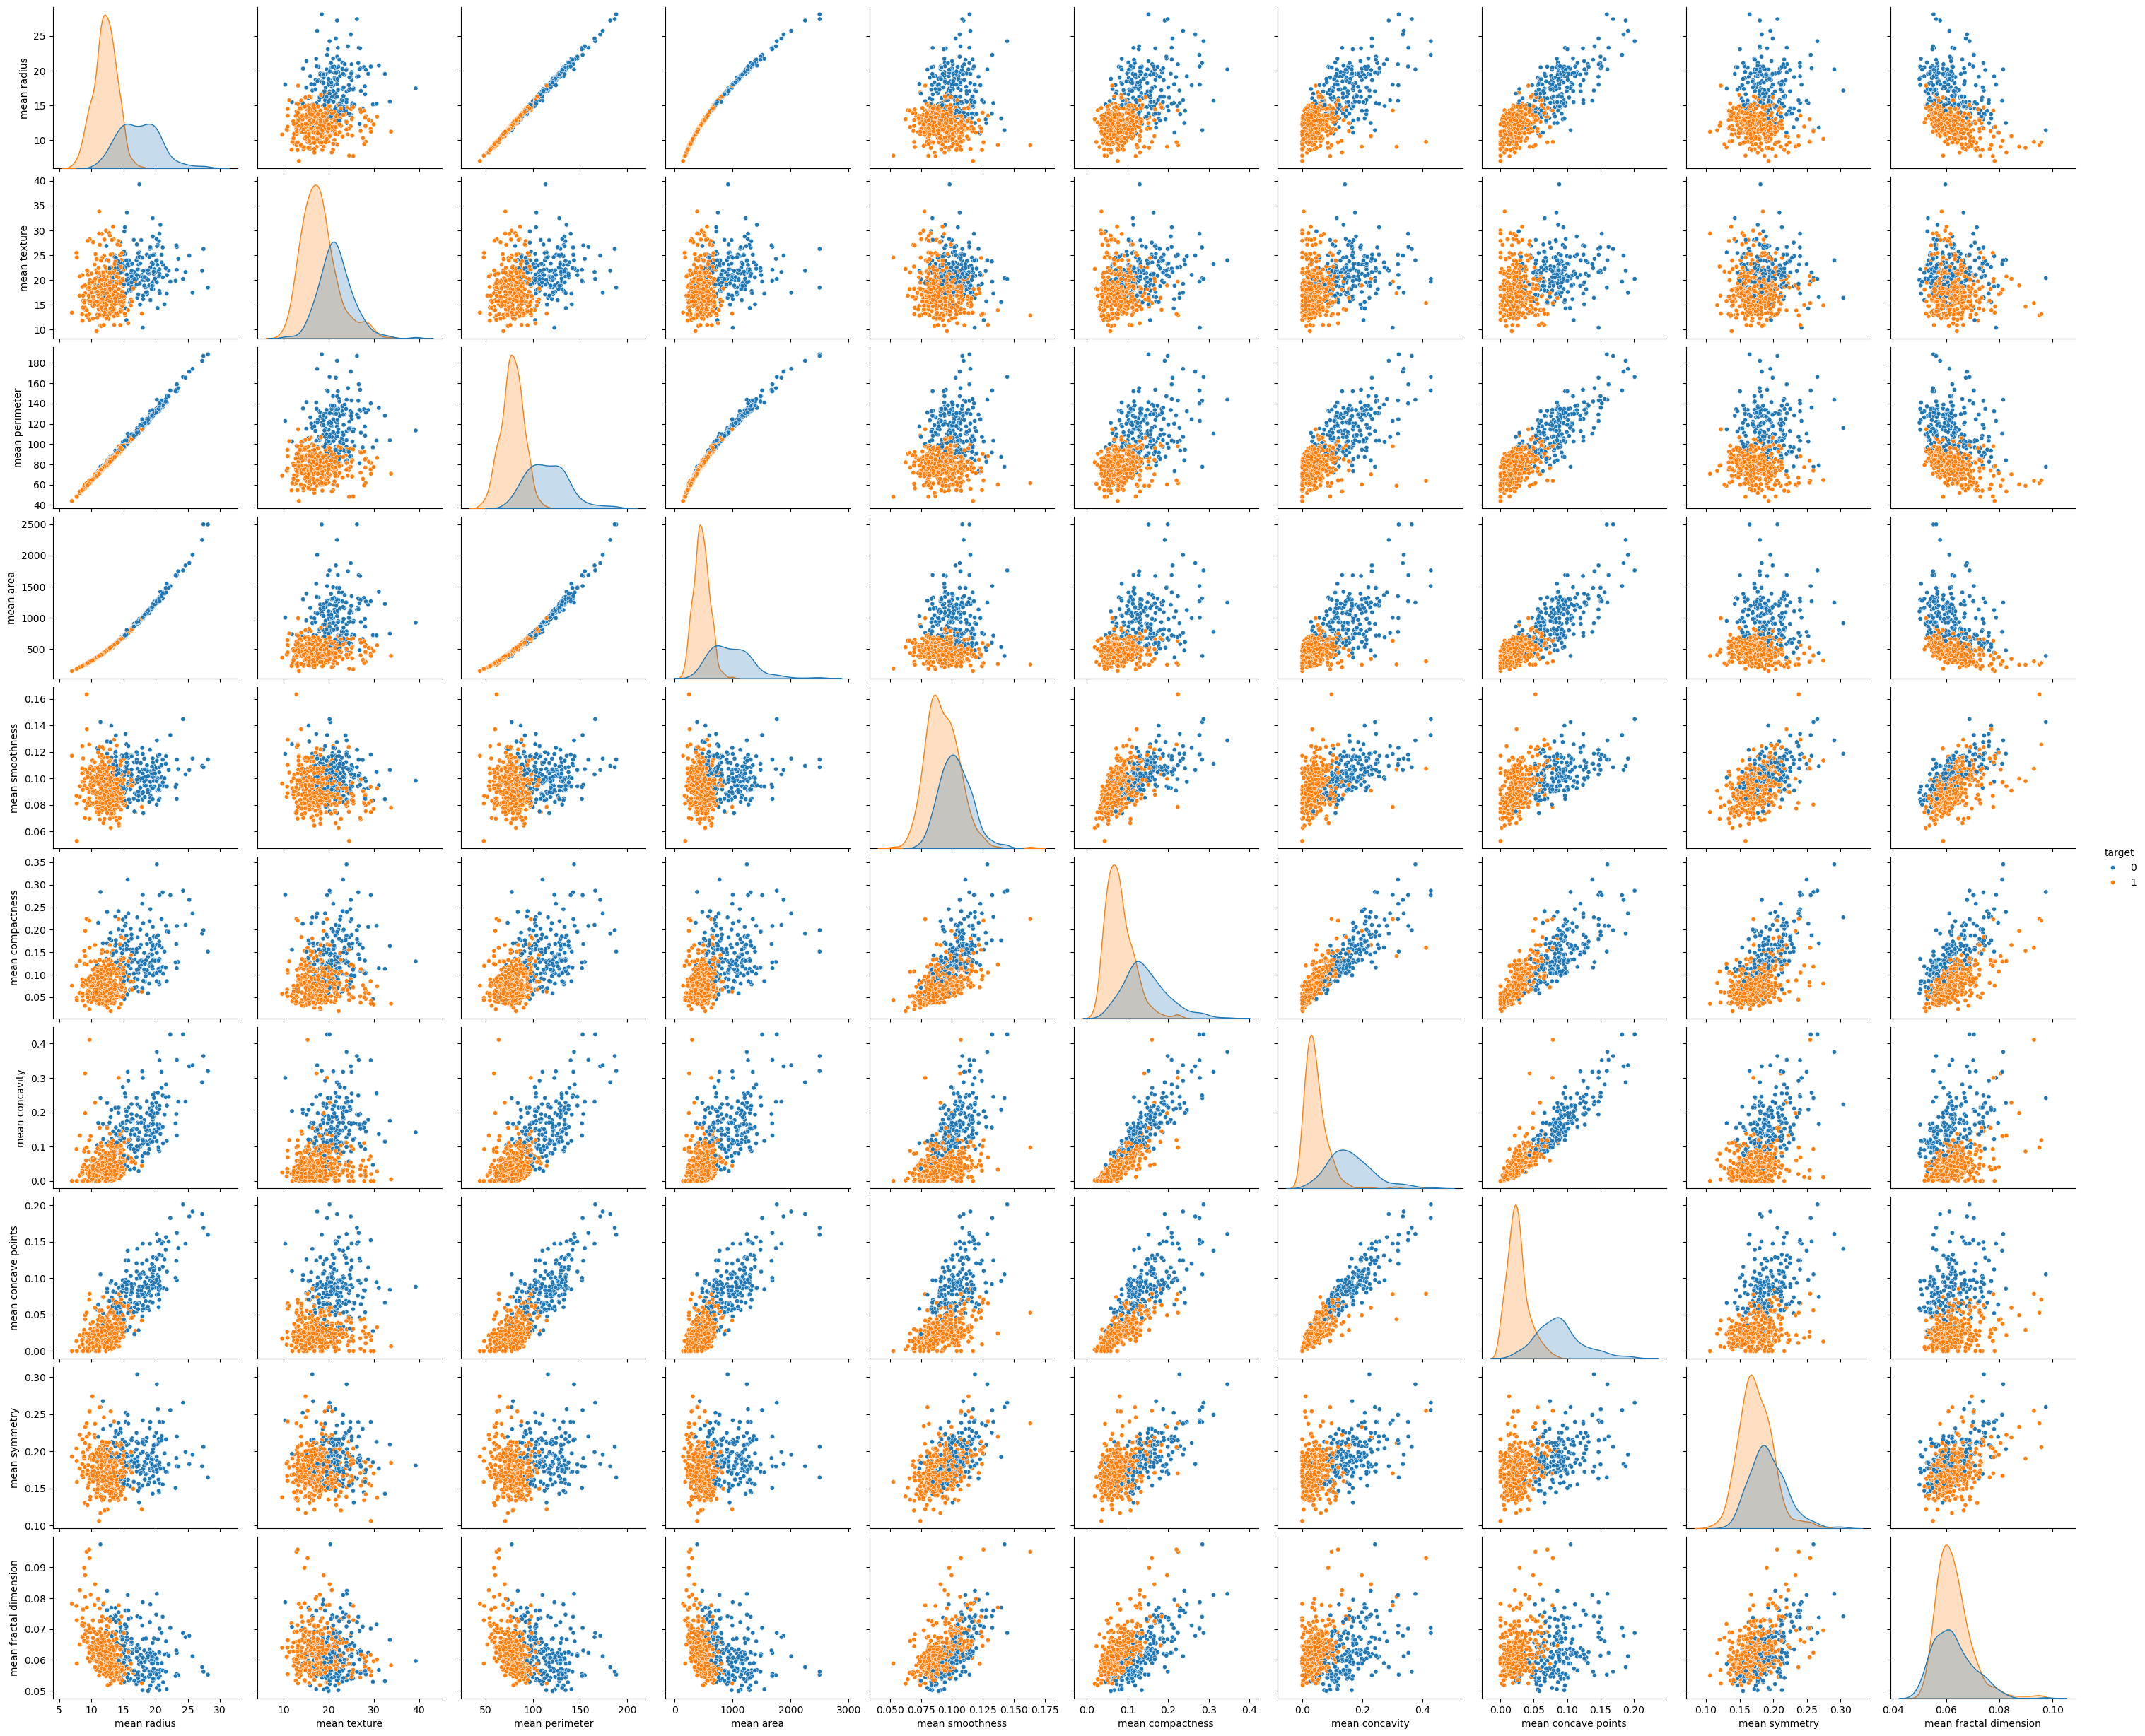

In [6]:
# Make pairplots between all features with the target variable being outcome
cancer_df_means = cancer_df[
    [col for col in cancer_df.columns if col.startswith("mean") or col == "target"]
]
sns.pairplot(
    cancer_df_means,
    hue="target",
    markers="o",
    height=2.5,
    aspect=1.2,
    plot_kws={"s": 20},
)

## Pairplot (Only between worsts)

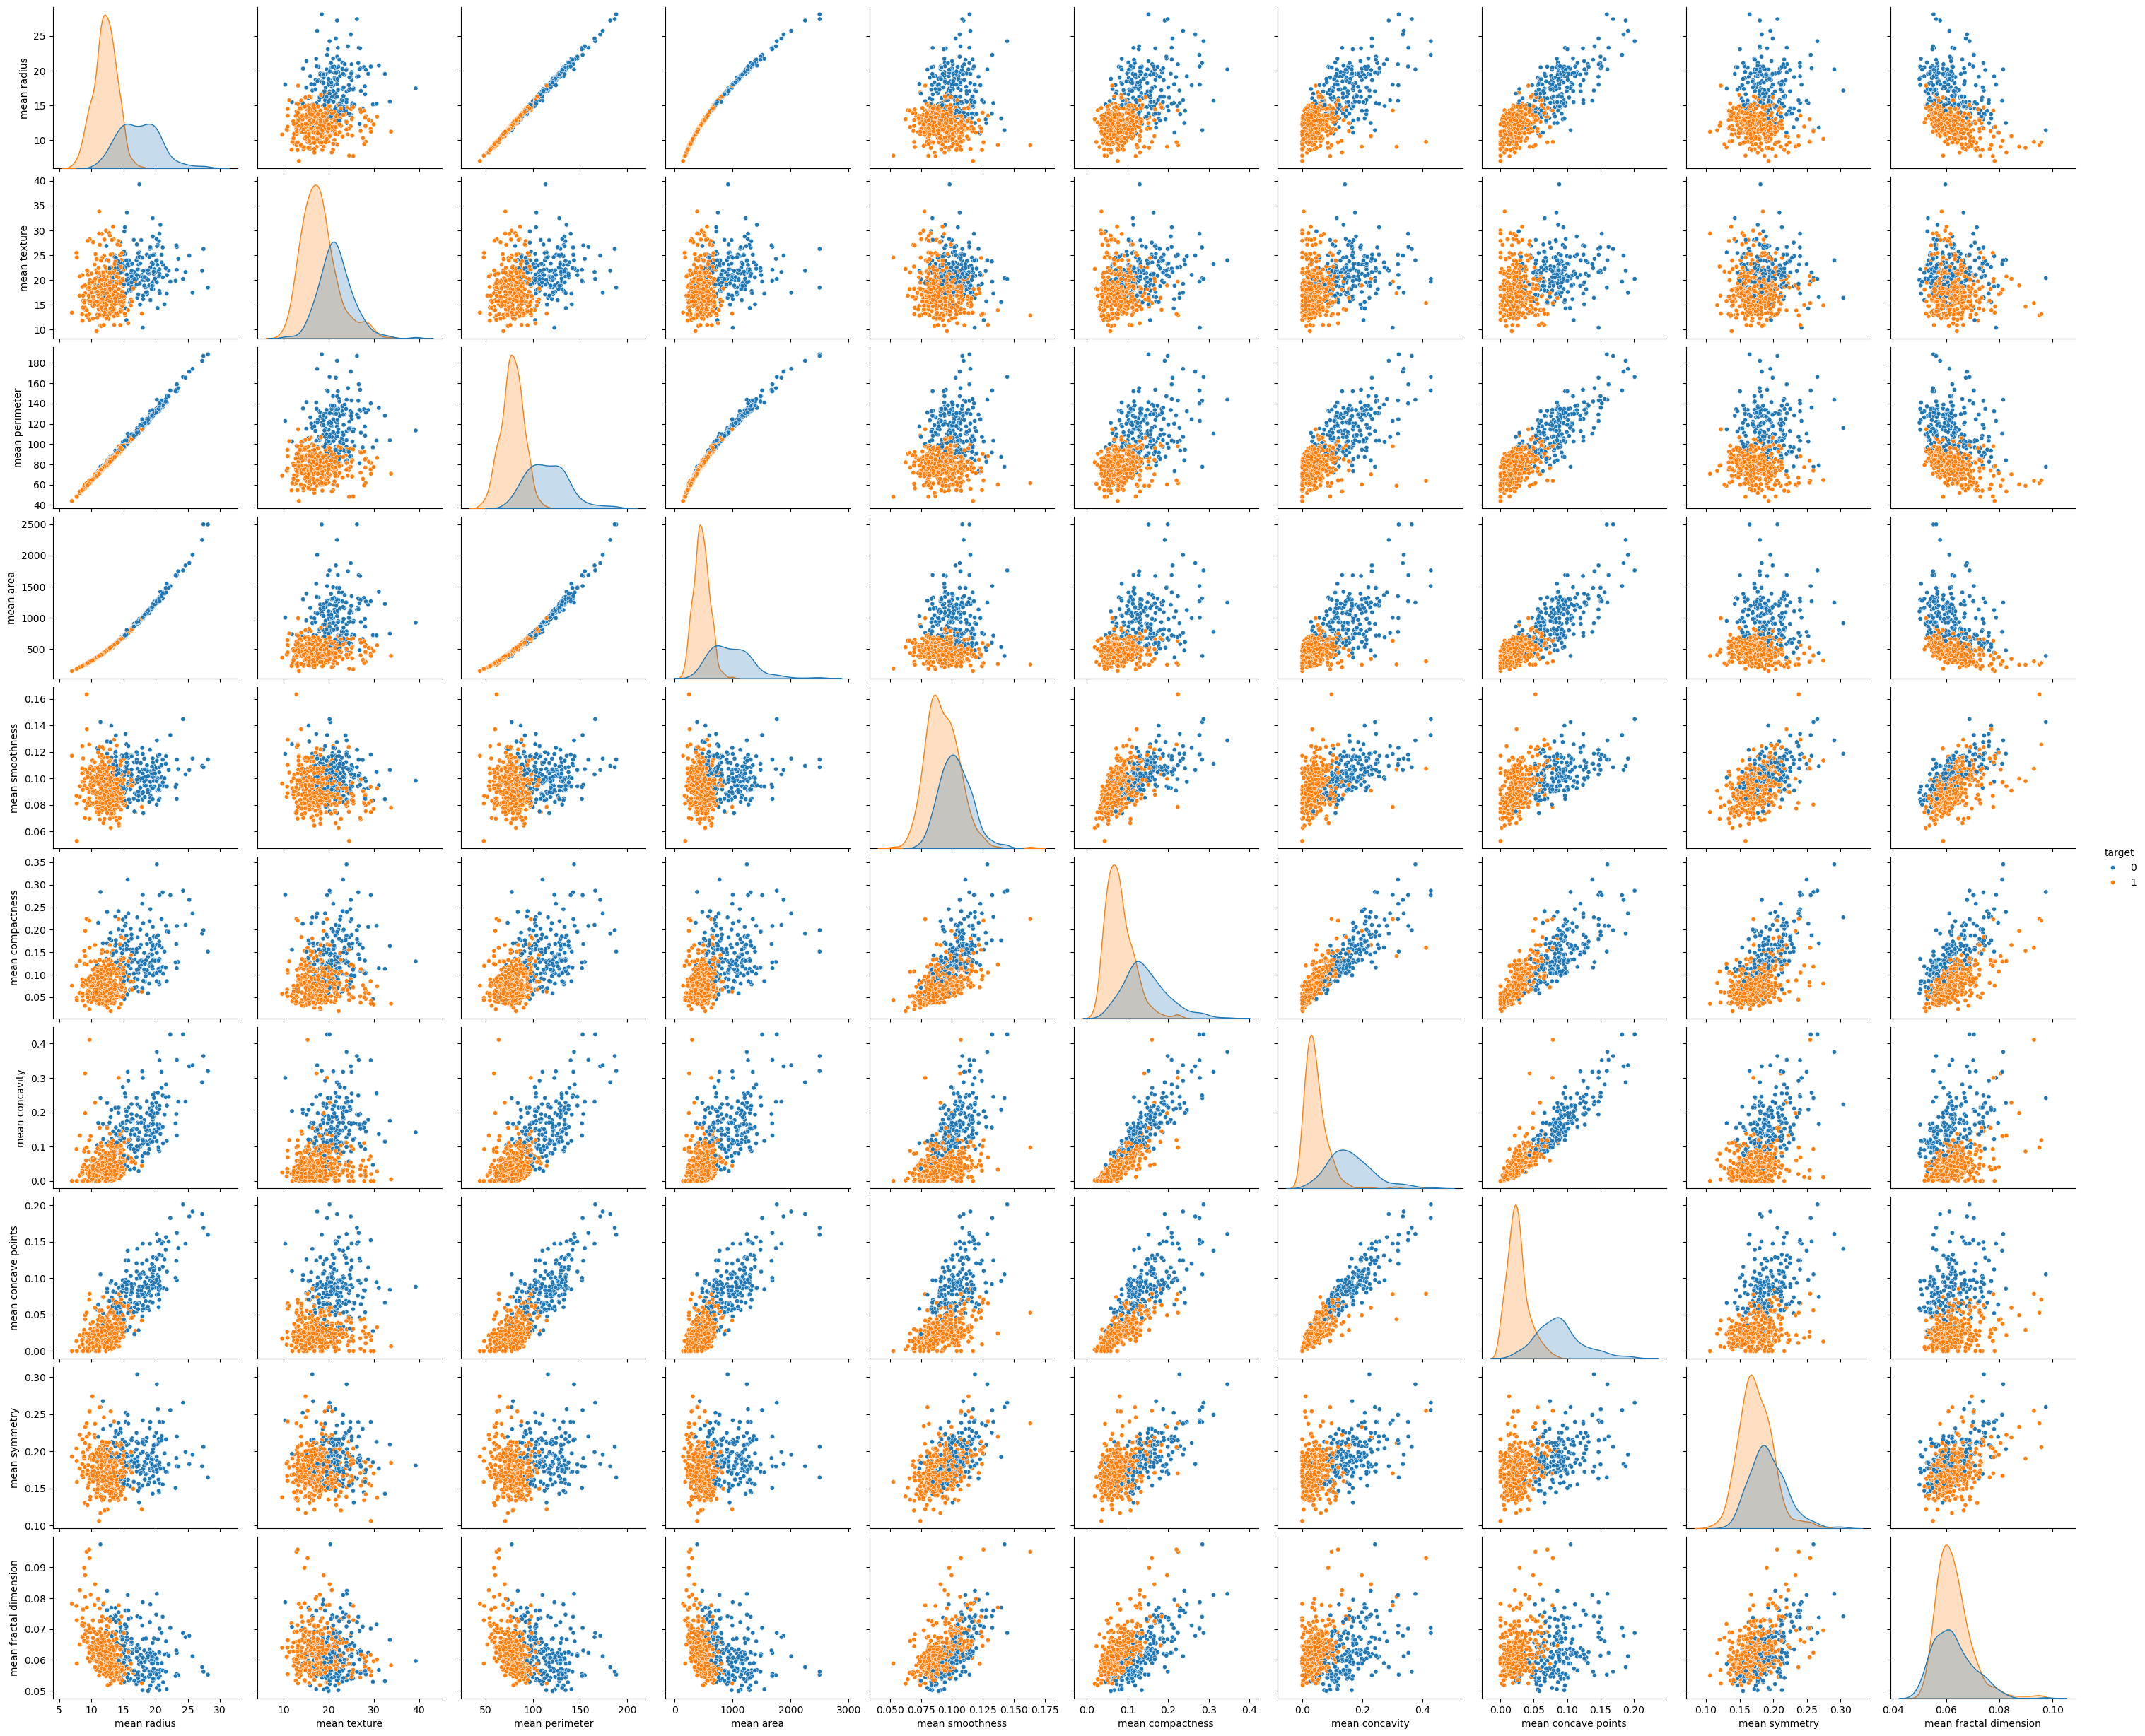

In [7]:
# Make pairplots between all features with the target variable being outcome
cancer_df_worsts = cancer_df[
    [col for col in cancer_df.columns if col.startswith("worst") or col == "target"]
]
sns.pairplot(
    cancer_df_means,
    hue="target",
    markers="o",
    height=2.5,
    aspect=1.2,
    plot_kws={"s": 20},
)

## Correlation Plot

<Axes: >

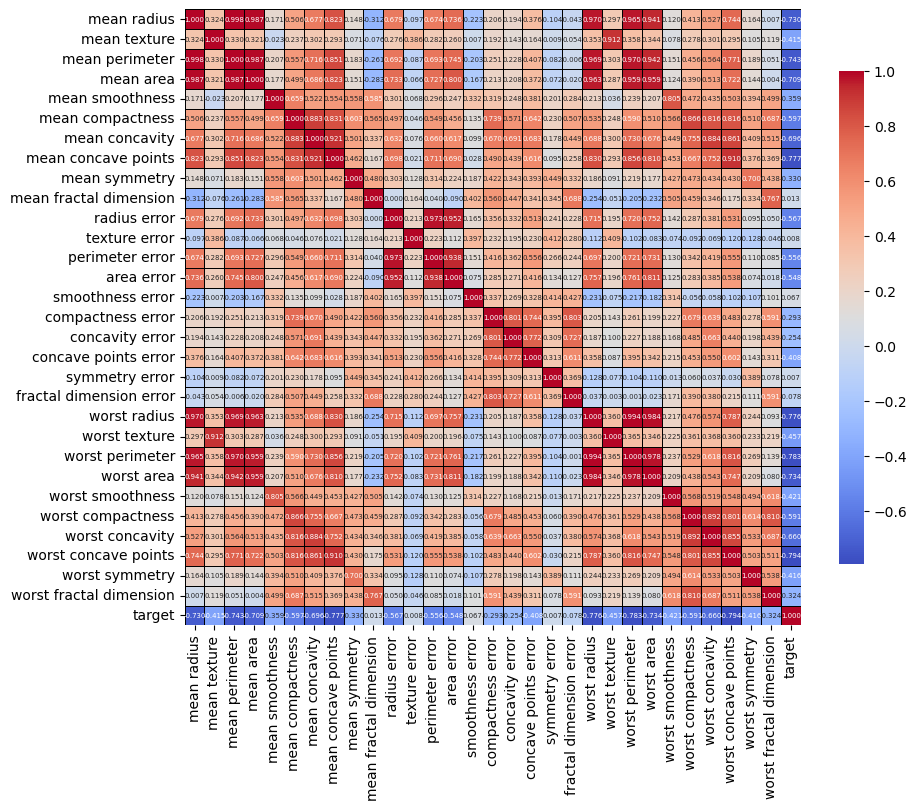

In [8]:
# Make a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    cancer_df.corr(),
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 5},
    linewidths=0.5,
    linecolor="black",
)
#

## Countplot

/var/folders/tp/3nd20r2x6ns2txnn5kmx15dr0000gn/T/ipykernel_26343/474471373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=cancer_df, palette='Set2')


<Axes: xlabel='target', ylabel='count'>

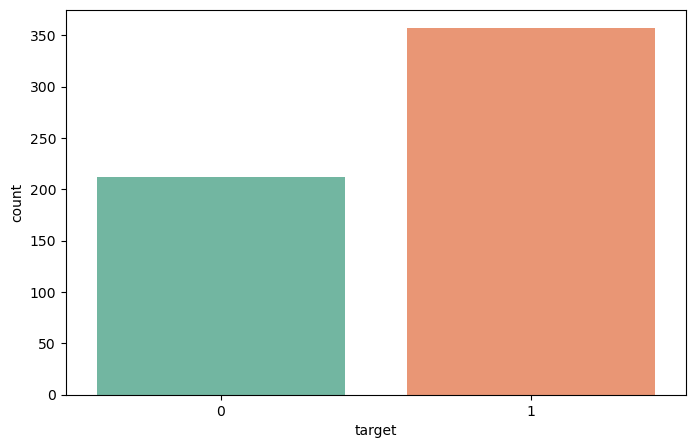

In [9]:
# Countplot of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x="target", data=cancer_df, palette="Set2")

## Feature Distribution Plots

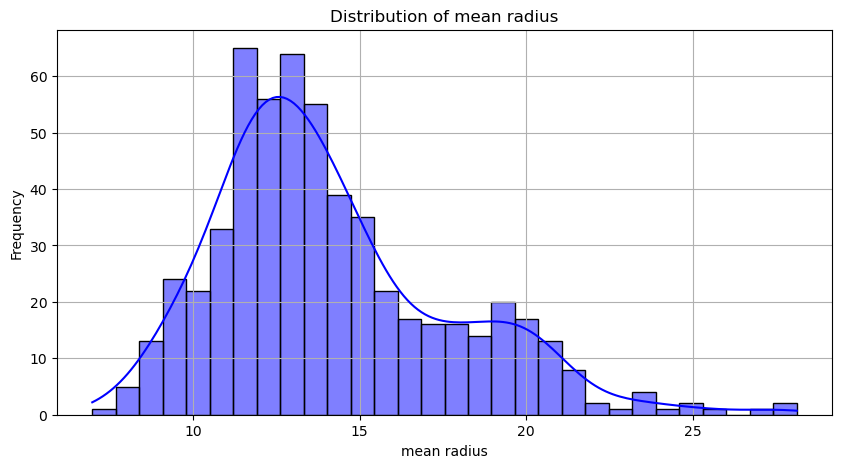

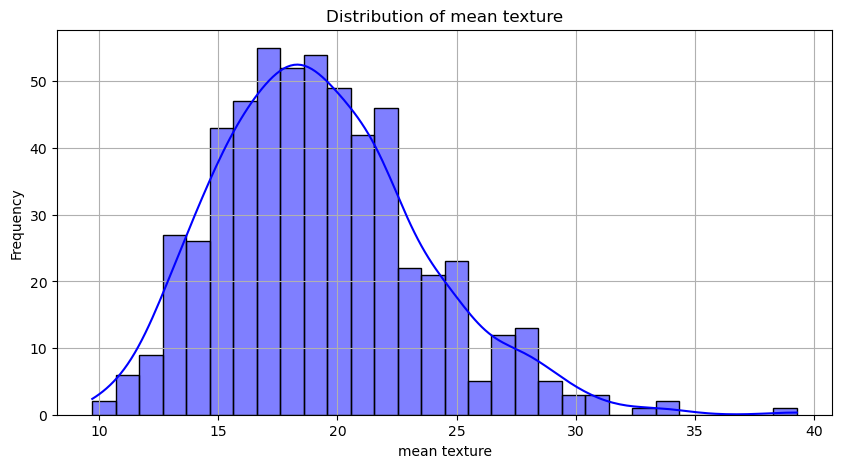

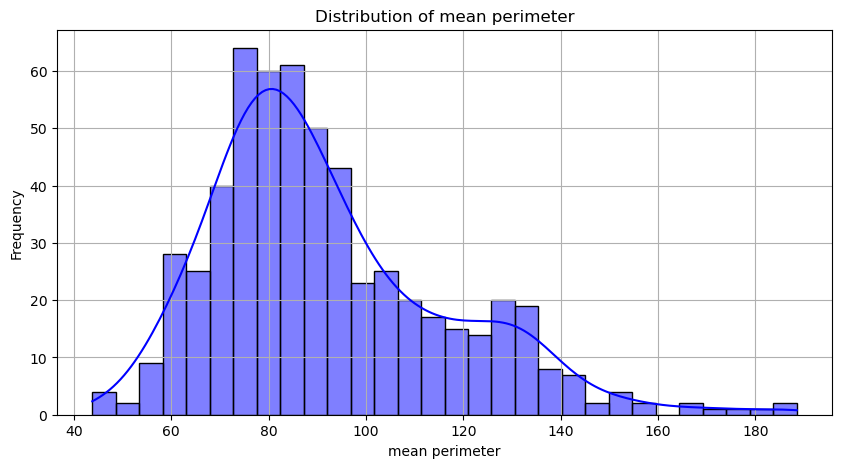

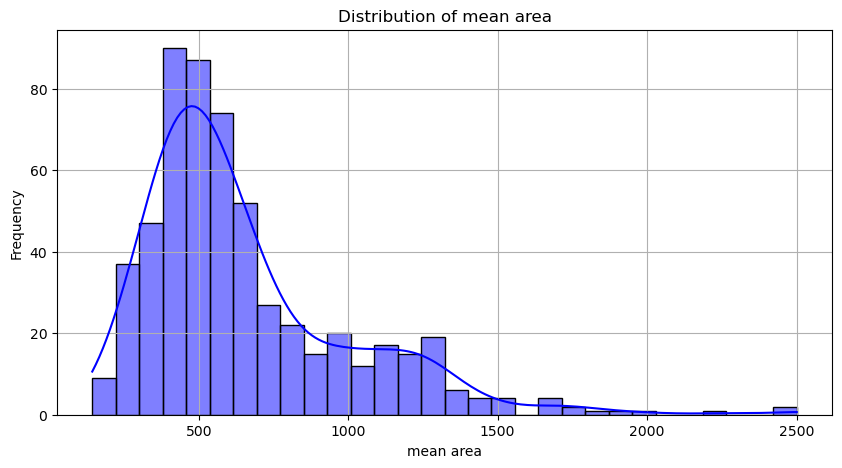

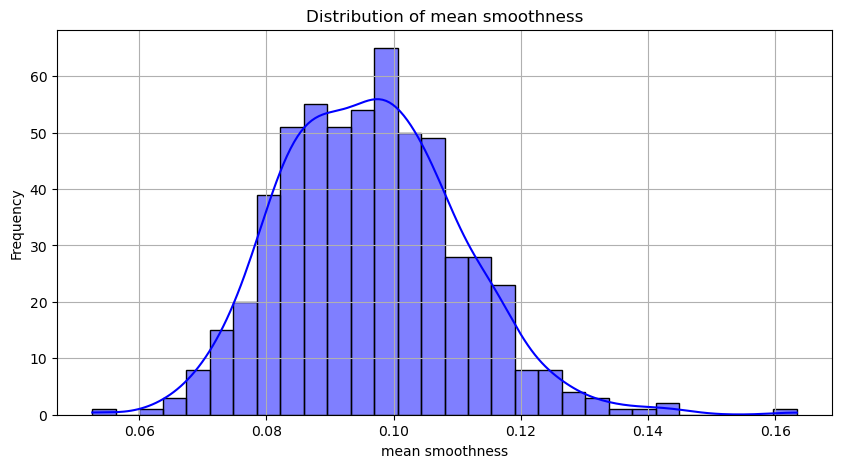

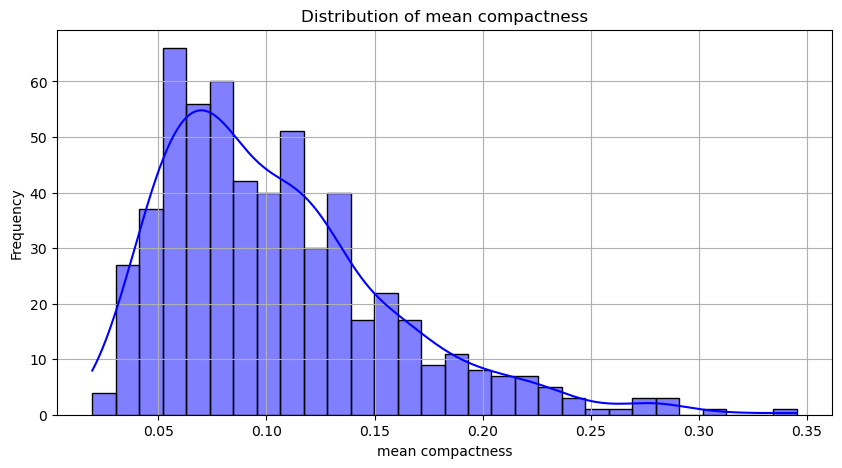

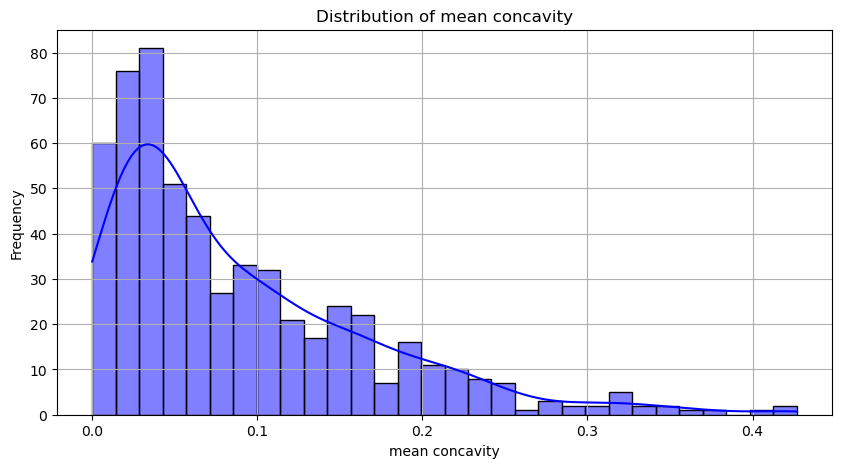

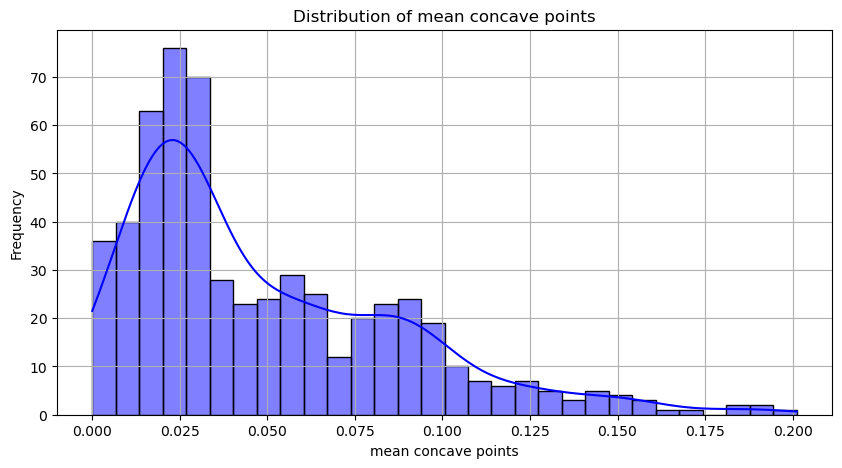

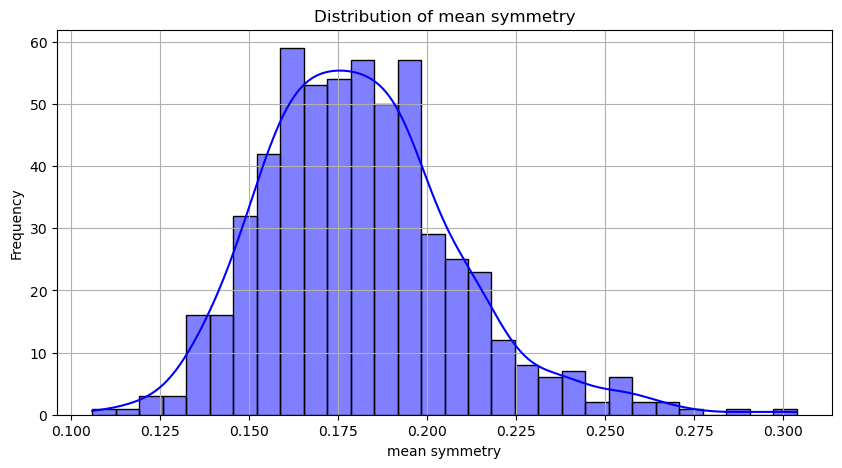

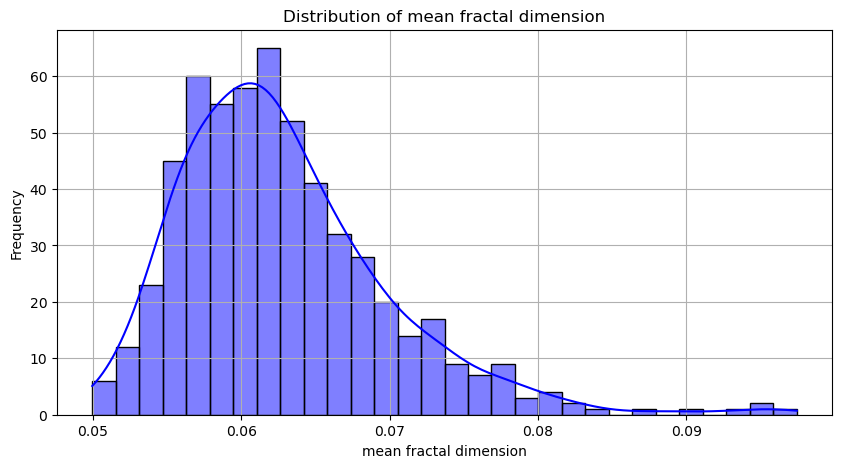

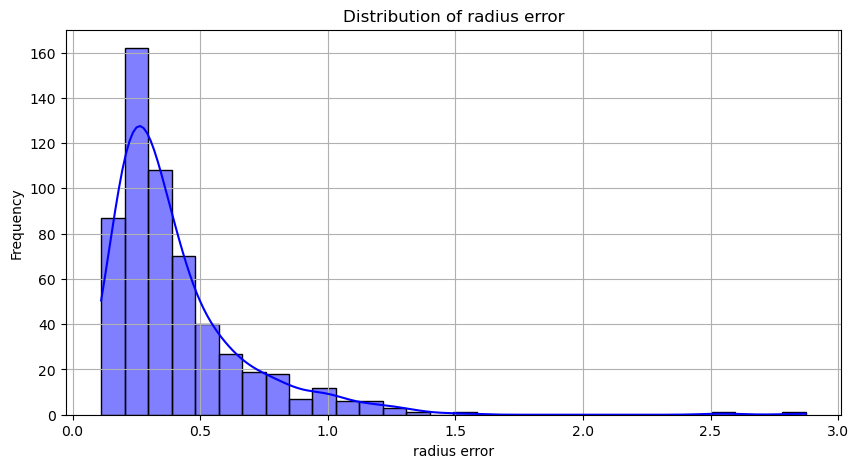

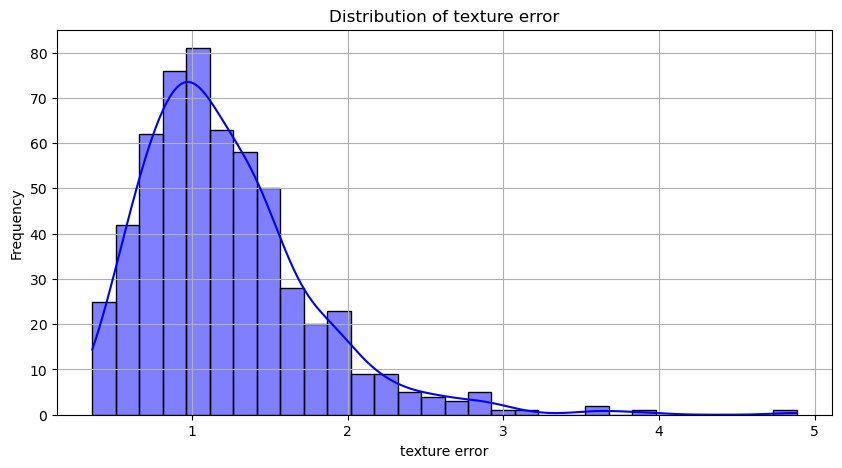

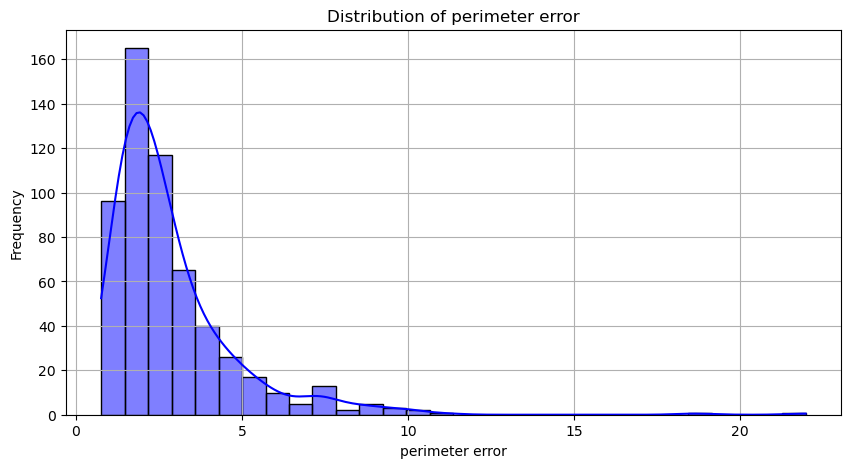

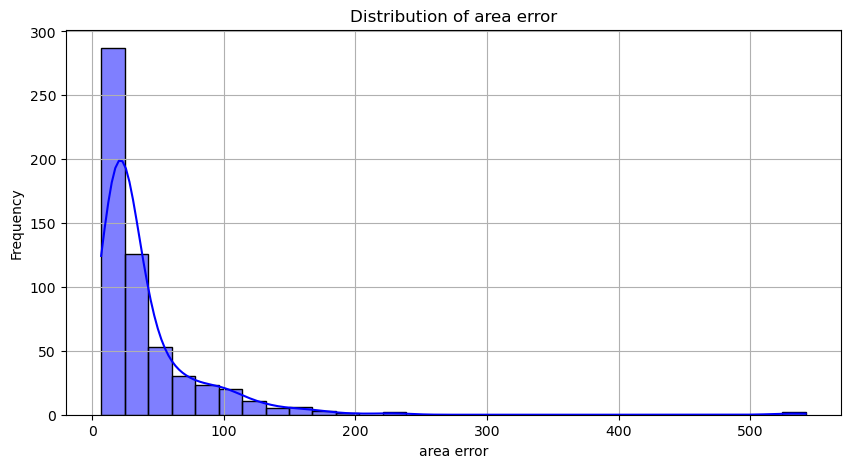

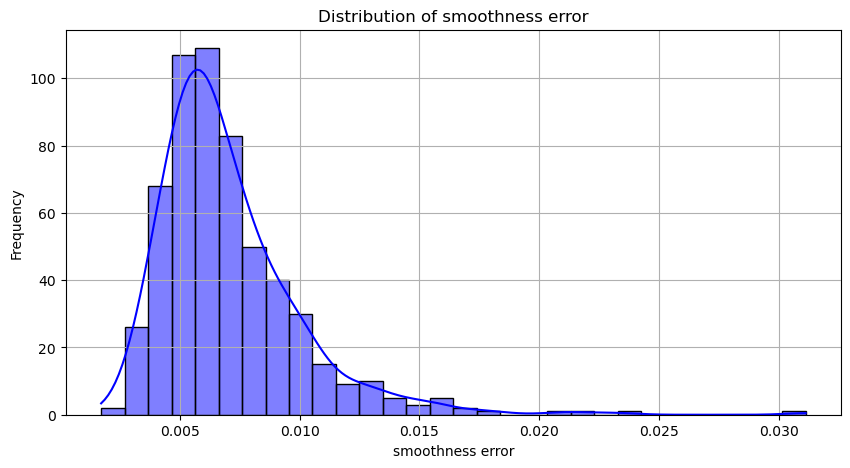

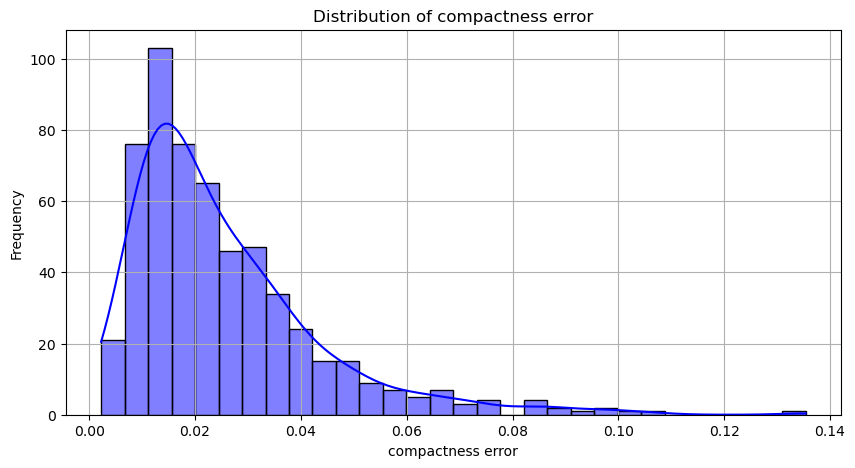

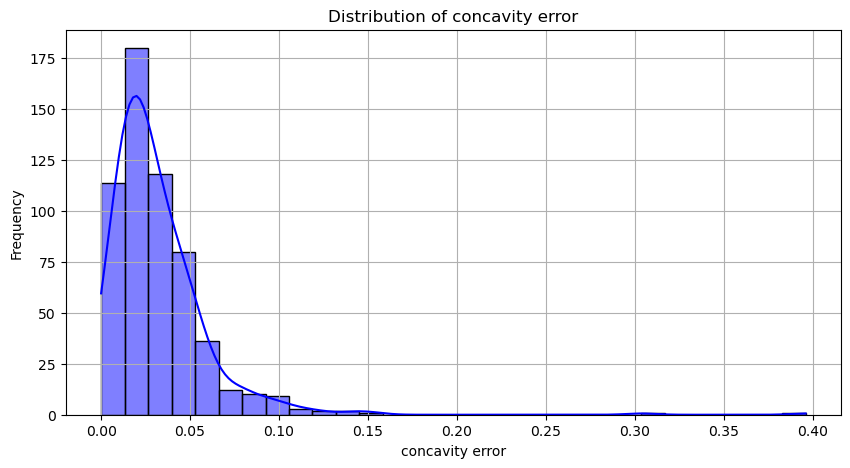

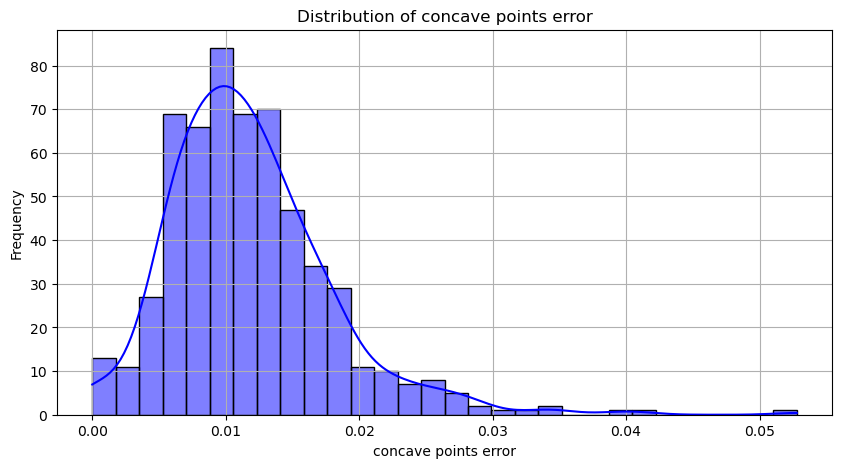

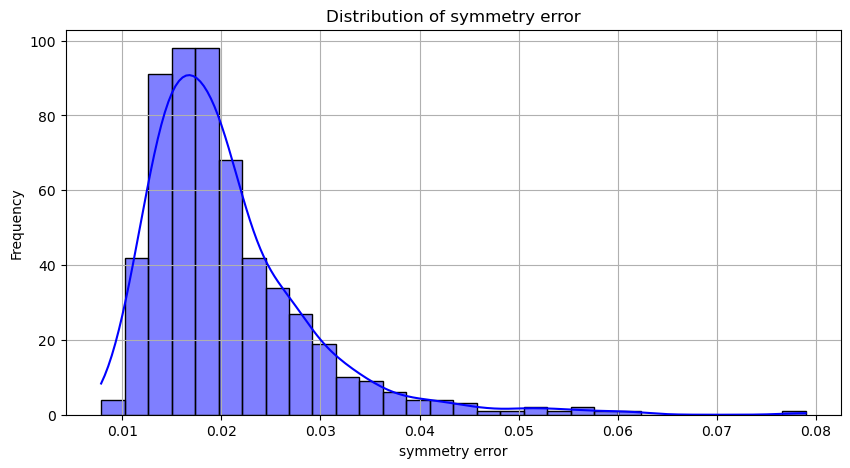

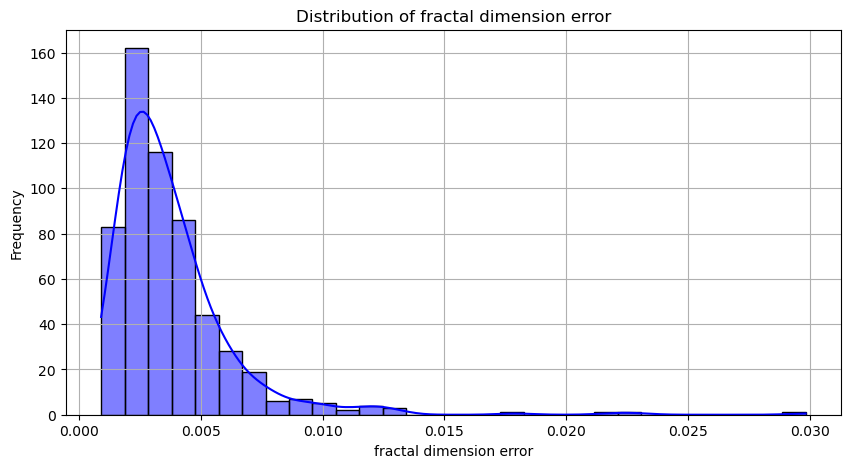

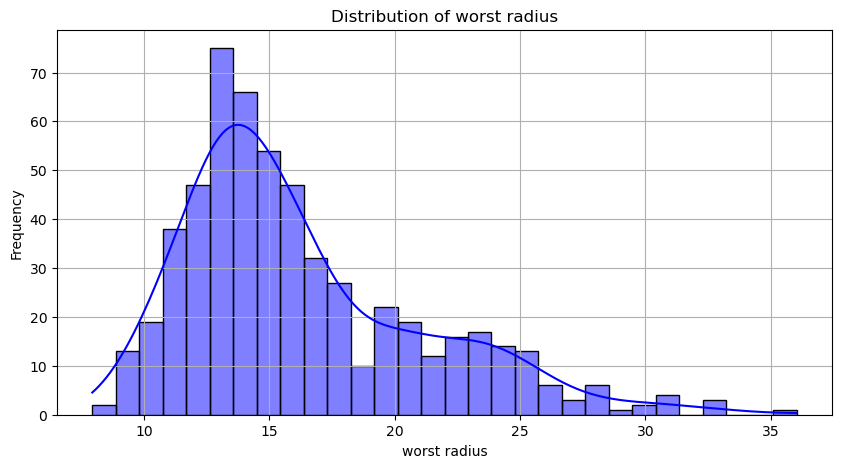

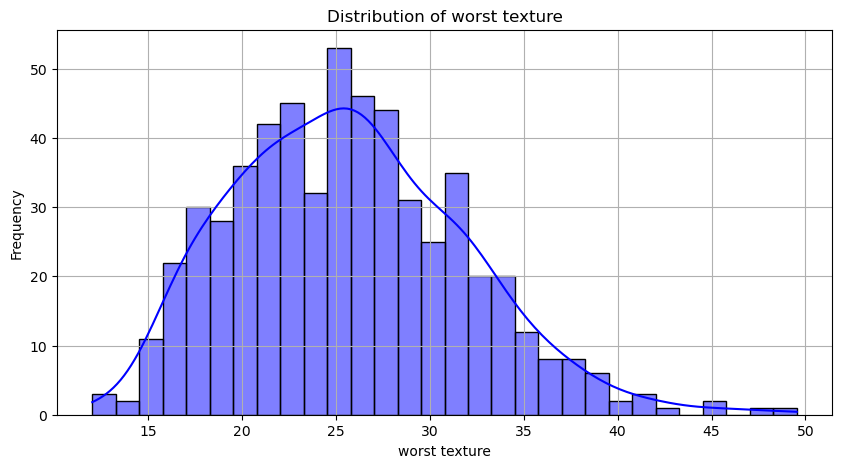

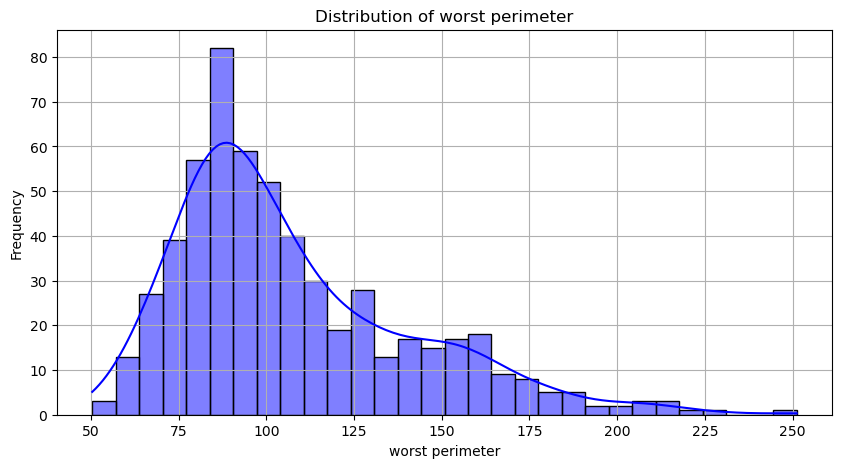

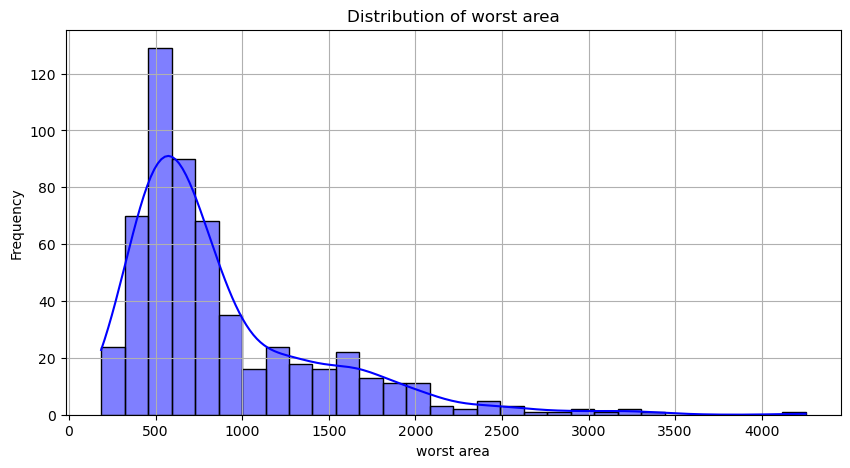

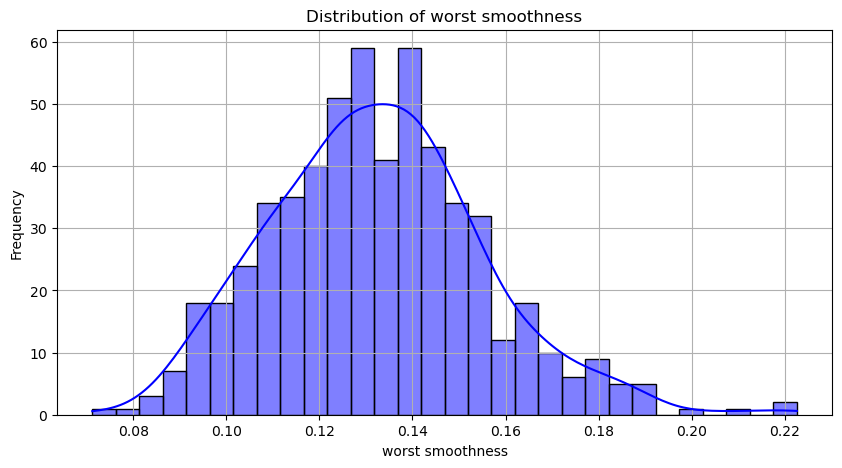

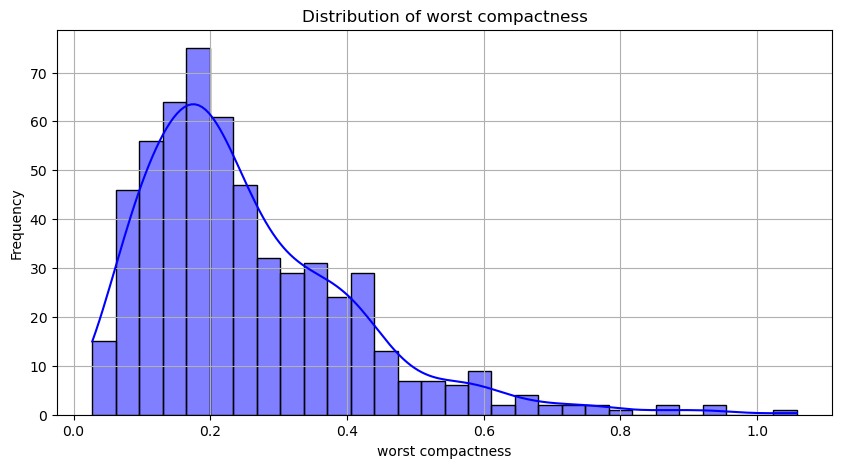

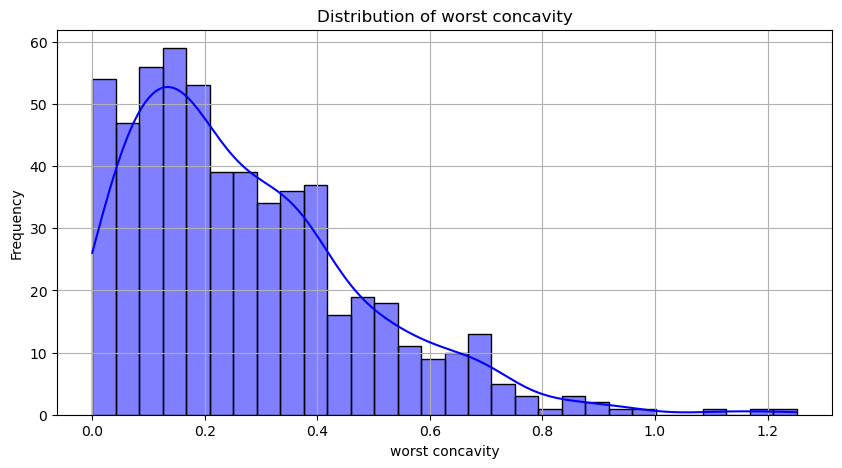

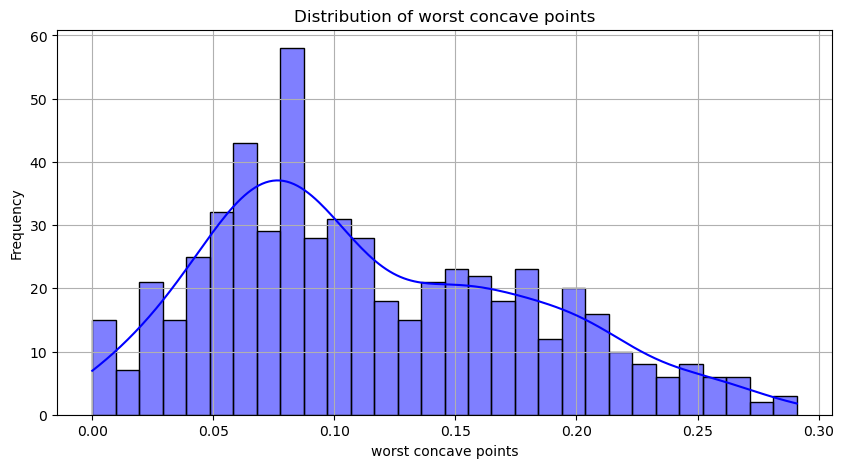

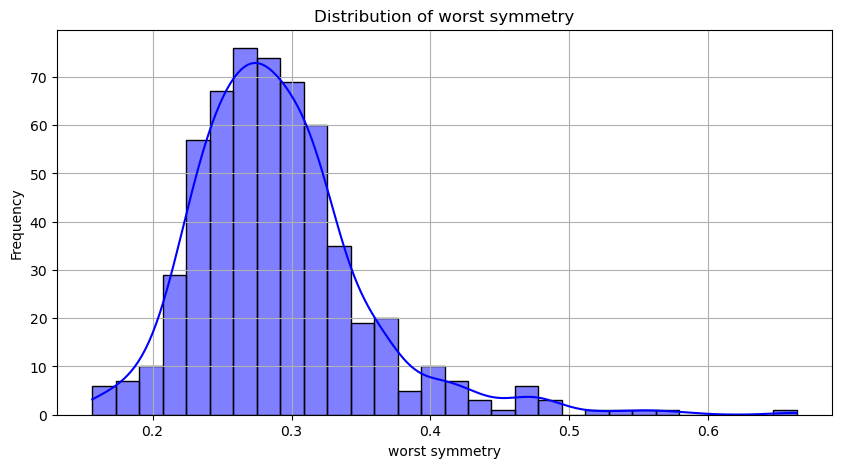

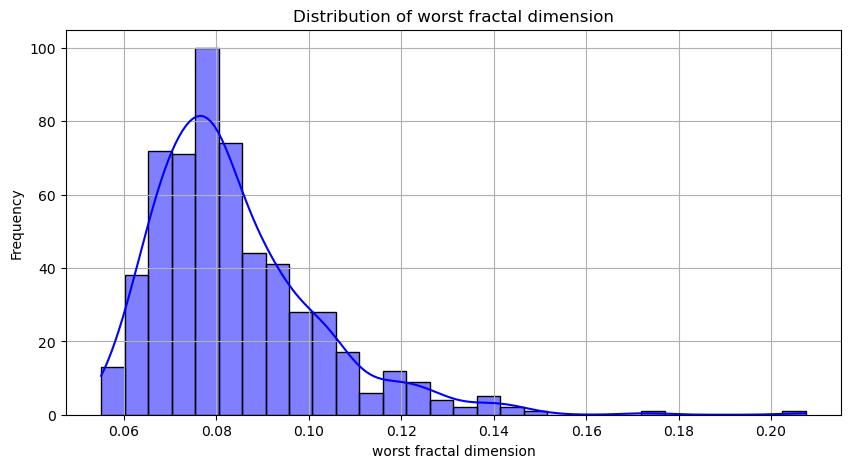

In [10]:
# Feature distribution plots
def plot_feature_distribution(df, feature):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()


# Plot feature distributions for all features
for feature in cancer_df.columns[:-1]:  # Exclude the target variable 'Outcome'
    plot_feature_distribution(cancer_df, feature)

# Model Fitting and Scoring

### Preparation

In [11]:
def grid_search_preset(pipe_source, grid_search_source):
    prep_pipe = get_preprocessing_pipe(scaling=True, preprocessing="PCA")
    pipe = pipe_source(prep_pipe)
    prep_grid = get_preprocessing_grid_search(pipe)
    return grid_search_source(pipe, prep_grid, scoring="f1")

## KNN

In [12]:
grid_search = grid_search_preset(get_knn_pipe, get_knn_grid_search)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print classification report for the best model
print("KNN Report:")
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the best parameters and score
print("Best Parameters:", best_params)
print("F1 Score of Best Model:", best_score)

knn_grid_search = grid_search

KNN Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.96      0.92      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

Confusion Matrix:
[[39  3]
 [ 6 66]]
Best Parameters: {'KNN__algorithm': 'auto', 'KNN__n_neighbors': 7, 'KNN__weights': 'uniform', 'PCA__n_components': 5, 'PCA__random_state': 42, 'Scaler': StandardScaler()}
F1 Score of Best Model: 0.9771980285254622


## Naive Bayes

In [13]:
grid_search = grid_search_preset(get_naive_bayes_pipe, get_naive_bayes_grid_search)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print classification report for the best model
print("Naive Bayes Report:")
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Best Parameters:", best_params)
print("F1 Score of Best Model:", best_score)

naive_bayes_grid_search = grid_search

Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.93      0.90      0.92        72

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.89       114
weighted avg       0.90      0.89      0.90       114

Confusion Matrix:
[[37  5]
 [ 7 65]]
Best Parameters: {'PCA__n_components': 5, 'PCA__random_state': 42, 'Scaler': StandardScaler(), 'clf': GaussianNB(), 'clf__var_smoothing': 1e-09}
F1 Score of Best Model: 0.9547040124626331


## Logistic Regression

In [14]:
# "UserWarning: Setting penalty='None' will ignore the C and l1_ratio parameters"
# Repeated warnings coming from logreg grid search can be suppressed with this file
# Penalty=None is not supported for the liblinear solver, so 1/4 fail, but that's okay.
from remove_warnings import *

with suppress_stdout_stderr():
    warnings.filterwarnings("ignore", category=UserWarning)

    grid_search = grid_search_preset(get_log_reg_pipe, get_log_reg_grid_search)

    grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print classification report for the best model
print("Logistic Regression Report:")
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Best Parameters:", best_params)
print("F1 Score of Best Model:", best_score)

log_reg_grid_search = grid_search

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
[[40  2]
 [ 4 68]]
Best Parameters: {'LogisticRegression__C': 1, 'LogisticRegression__penalty': 'l2', 'LogisticRegression__solver': 'liblinear', 'PCA__n_components': 5, 'PCA__random_state': 42, 'Scaler': StandardScaler()}
F1 Score of Best Model: 0.98068486433475


# Decision Trees

In [15]:
grid_search = grid_search_preset(get_decision_tree_pipe, get_decision_tree_grid_search)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print classification report for the best model
print("Decision Tree Report:")
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Best Parameters:", best_params)
print("F1 Score of Best Model:", best_score)

decision_tree_grid_search = grid_search

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90        42
           1       0.98      0.89      0.93        72

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114

Confusion Matrix:
[[41  1]
 [ 8 64]]
Best Parameters: {'DecisionTree__criterion': 'gini', 'DecisionTree__max_depth': 5, 'DecisionTree__min_samples_leaf': 1, 'DecisionTree__min_samples_split': 5, 'PCA__n_components': 3, 'PCA__random_state': 42, 'Scaler': StandardScaler()}
F1 Score of Best Model: 0.9609786791365739


# Support Vector Machines

### Linear Support Vector Machines (Faster: able to utilize larger grid search space)

In [16]:
grid_search = grid_search_preset(get_lin_svm_pipe, get_lin_svm_grid_search)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print classification report for the best model
print("Linear SVM Report:")
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Best Parameters:", best_params)
print("F1 Score of Best Model:", best_score)

linear_svm_grid_search = grid_search

Linear SVM Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
[[40  2]
 [ 4 68]]
Best Parameters: {'PCA__n_components': 5, 'PCA__random_state': 42, 'SVM__C': 0.1, 'SVM__penalty': 'l1', 'Scaler': StandardScaler()}
F1 Score of Best Model: 0.9788528506722752


### Nonlinear / Kernel Support Vector Machines

In [17]:
grid_search = grid_search_preset(get_kernel_svm_pipe, get_kernel_svm_grid_search)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Kernel SVM Report:")
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Best Parameters:", best_params)
print("F1 Score of Best Model:", best_score)

kernel_svm_grid_search = grid_search

Kernel SVM Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
[[40  2]
 [ 4 68]]
Best Parameters: {'PCA__n_components': 5, 'PCA__random_state': 42, 'SVM__C': 10, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf', 'SVM__probability': False, 'Scaler': StandardScaler()}
F1 Score of Best Model: 0.9806508566197307


## Final Score Comparison

In [18]:
# Final score comparison
print("\n===Final F1 Score Comparison===\n")
print(f"KNN:{round(knn_grid_search.best_score_ * 100, 2)}%")
print(f"Naive Bayes:{round(naive_bayes_grid_search.best_score_ * 100, 2)}%")
print(f"Logistic Regression:{round(log_reg_grid_search.best_score_ * 100, 2)}%")
print(f"Decision Tree:{round(decision_tree_grid_search.best_score_ * 100, 2)}%")
print(f"Linear SVM:{round(linear_svm_grid_search.best_score_ * 100, 2)}%")
print(f"Kernel SVM:{round(kernel_svm_grid_search.best_score_ * 100, 2)}%")


===Final F1 Score Comparison===

KNN:97.72%
Naive Bayes:95.47%
Logistic Regression:98.07%
Decision Tree:96.1%
Linear SVM:97.89%
Kernel SVM:98.07%


# Time Reports for all training

In [19]:
print("=========KNN==========")
print_time_report(knn_grid_search)
print("=========Naive Bayes==========")
print_time_report(naive_bayes_grid_search)
print("=========Logistic Regression==========")
print_time_report(log_reg_grid_search)
print("=========Decision Tree==========")
print_time_report(decision_tree_grid_search)
print("=========Linear SVM==========")
print_time_report(linear_svm_grid_search)
print("=========Kernel SVM==========")
print_time_report(kernel_svm_grid_search)

=========KNN==========

=== Training Time by 'Scaler' ===
param_Scaler
StandardScaler()    0.006054
Name: mean_fit_time, dtype: float64

=== Training Time by 'PCA__n_components' ===
param_PCA__n_components
3    0.005523
5    0.005541
4    0.005868
2    0.006281
Name: mean_fit_time, dtype: float64

=== Training Time by 'PCA__random_state' ===
param_PCA__random_state
42    0.005803
Name: mean_fit_time, dtype: float64

=== Training Time by 'KNN__n_neighbors' ===
param_KNN__n_neighbors
9    0.004859
7    0.005290
5    0.006285
3    0.006779
Name: mean_fit_time, dtype: float64

=== Training Time by 'KNN__weights' ===
param_KNN__weights
distance    0.005512
uniform     0.006094
Name: mean_fit_time, dtype: float64

=== Training Time by 'KNN__algorithm' ===
param_KNN__algorithm
kd_tree      0.004037
ball_tree    0.005188
brute        0.005990
auto         0.007997
Name: mean_fit_time, dtype: float64
=========Naive Bayes==========

====== Training Time by Group 1 ======

=== Training Time by 'S